<a id="top">

<center><h1>Python <a href="http://pandas.pydata.org/pandas-docs/stable/">Pandas</a> Cheat Sheet</h1></center>

As a data analyst, below are common tasks I perform using Pandas.  However, best practice rule of thumb is to use as much SQL as possible for transformations or summarizations before pulling data into pandas as pandas is limited to using your local machine's resources.  Another reason why SQL should be used as much as possible, there will likely be more people that are familiar with SQL in your organization than Python/pandas.  So to reduce "technical debt", Python or pandas use should be limited if data manipulations can be done in SQL instead.

- [Pandas display output options](#options)
- [Quick summary statistics, # of rows, columns, etc](#quick_summary)
- [Sorting More Than One Column](#sorting)
- [Removing duplicates](#removing_duplicates)
- [Finding duplicates](#find_duplicates)
- [Creating a column based on values from another column](#map)
- [Removing a column](#remove_column)
- [Replacing values in a series](#replacing_values)
- [Dropping or Filling NaN/NA values](#drop_fill_na)
- [Using ```converters``` parameter to convert data during data ingestion](#converters)
- [Reading CSV or Excel files](http://pandas.pydata.org/pandas-docs/stable/io.html)
- [Renaming axis](#renaming_axis)
- [Renaming indexes or columns](#renaming_indexes_columns)
- [Binning data into intervals](#binning)
- [Sub-selecting or Slicing a Data Frame](#slicing)
- [Boolean indexing](#boolean)
- [Accessors](#accessors)
- [Obtaining columns with partial column labels](#partial_column_labels)
- [Getting value counts](#value_counts)
- [Getting cumulative sum](#cum_sum)
- [Grouping data](#group)
- [Pivot table](#pivot_table)
- [Named aggregations (version 0.25)](#named_aggregation)
- [Percent of Rows](#perc_rows)
- [Percent of Columns](#perc_columns)
- [Transpose a data frame](#transpose)
- [Converting index to a column](#index2column)
- [Converting column to index](#column2index)
- [How to add or fill in missing dates](#missing_dates)
- [How to connect to an ODBC data source (Windows)](#database)
- [How to convert data in wide format to long format using melt()](#melt)
- [How to convert data in long format data to wide format using pivot()](#pivot)
- [Using category data type to control sort order](#category)
- [Merging 2 data frames using merge()](#merge)
- [Finding rows containing data with missing values](#missing)
- [Converting a data type of a column in a data frame](#convert_type)
- [Plotting data frames using MATPLOTLIB ver 1.5+](#matplotlib)
- [Method chaining](#chaining)
- [pipe() example](#pipe)
- [Debugging groupby objects with this introspection method](https://realpython.com/python-pandas-tricks/#6-introspect-groupby-objects-via-iteration)
- [Mapping trick for memebership binning](https://realpython.com/python-pandas-tricks/#7-use-this-mapping-trick-for-membership-binning)
- [BONUS #1: A HUGE list of python and pandas snippets by Chris Albon](http://chrisalbon.com/)
- [BONUS #2: More goodies from a major pandas contributor, Tom Augspurger](http://tomaugspurger.github.io/)
- [BONUS #3: Data School YouTube Series on Pandas](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y) and it's accompanying [notebooks](https://github.com/justmarkham/pandas-videos) on Github!
- [BONUS #4: Article on Dask: pandas on steroids](https://towardsdatascience.com/why-every-data-scientist-should-use-dask-81b2b850e15b) [Basic Video Overview](https://www.youtube.com/watch?v=ods97a5Pzw0) [More Detailed Video Overview](https://www.youtube.com/watch?v=mjQ7tCQxYFQ)
- [BONUS #5: 25 Pandas Tips and Tricks by Kevin Markham](https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/top_25_pandas_tricks.ipynb)

<a id='options'></a>

### Setting display output [options](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html)

By default, a large pandas dataframe (several columns or several rows) won't be completely rendered in your browser.  You can override the defaults.  However, you should not be surprised if your browser crashes if it tries to render several hundreds of thousands of rows.  Here's the [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to pandas display options documentation.

[[back to top](#top)]

In [1]:
import pandas as pd
pd.set_option("display.max_rows",1000)    # or pd.options.display.max_rows=1000
pd.set_option("display.max_columns",20)   # or pd.options.display.max_columns=20 
pd.set_option('precision',7)
pd.set_option('large_repr', 'truncate')

<a id="quick_summary">

### Quick summary statistics using df.describe() and data types using df.info().  Also check out [pandas-summary](https://github.com/mouradmourafiq/pandas-summary) - an extension for data frame's describe() method and also [pandas profiling](https://github.com/JosPolfliet/pandas-profiling).

[[back to top]](#top)

In [2]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [3]:
data.describe()

,ounces
count,9.0000000
mean,6.0555556
std,2.8553069
min,3.0000000
25%,4.0000000
50%,6.0000000
75%,7.5000000
max,12.0000000


### df.info() shows data types, number of rows and columns, and memory usage of your data frame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   9 non-null      object 
 1   ounces  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


<a id='sorting'></a>

### Sorting More Than One Column

[[back to top]](#top)

**Just pass a list of columns you want to sort and pass corresponding list of True/False to the ascending parameter**

In [5]:
data.sort_values(by=['group','ounces'], ascending=[False, True], inplace=True)
data

,group,ounces
6,c,3.0
7,c,5.0
8,c,6.0
3,b,6.0
4,b,7.5
5,b,8.0
1,a,3.0
0,a,4.0
2,a,12.0


<a id='removing_duplicates'></a>

### Removing duplicates

[[back to top](#top)]

In [6]:
import pandas as pd
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 'k2': [3, 2, 1, 3, 3, 4, 4]})

In [7]:
data.sort_values(by='k2')
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [9]:
data.drop_duplicates()  # by default, a "duplicate" is defined by all columns

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


#### Define duplicates by column name(s):

In [10]:
data.drop_duplicates(subset='k1')  # duplicate in column k1 only

,k1,k2
0,one,3
3,two,3


<a id="find_duplicates">

### Finding duplicate rows

[[back to top](#top)]

In [11]:
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [12]:
help(data.duplicated)

Help on method duplicated in module pandas.core.frame:

duplicated(subset: Union[Hashable, Sequence[Hashable], NoneType] = None, keep: Union[str, bool] = 'first') -> 'Series' method of pandas.core.frame.DataFrame instance
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : Equiv

In [13]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,k1,k2
4,two,3
6,two,4


<a id="map"></a>

### Creating a new column based on values from one or more columns

If you are familiar with Excel's IF/ELSE function or SQL's CASE WHEN statements, then this section is for you.  For smallish data sets and not too complex IF/ELSE logic, `map()` and `apply()` are fine.  But for larger data sets, you will notice a significant slowdown.  For large data sets, you have a few options:

- use pandas `.loc`
- use `np.where`
- use `np.select`
- use [swifter](https://github.com/jmcarpenter2/swifter) library
- Dask's dataframe [apply](https://docs.dask.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.apply) which swifter does for you under the hood

This [article](https://towardsdatascience.com/efficient-implementation-of-conditional-logic-on-pandas-dataframes-4afa61eb7fce) summarizes the first 3 options above and explains the reasons for slowdown.  You may have to open the link using your browser's private/incognito mode.

If the data was originally sourced from a database table, then apply CASE WHEN logic prior to bringing the data into pandas.  Best practice rule of thumb is to use as much SQL as possible for transformations or summarizations before pulling data into pandas as pandas is limited to using your local machine's resources.  Another reason why SQL should be used as much as possible, there will likely be more people that are familiar with SQL in your organization than Python/pandas.  So to reduce "technical debt", Python or pandas use should be limited if data manipulations can be done in SQL instead.

[[back to top](#top)]

In [14]:
import pandas as pd
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'pastrami','corned beef', 'bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


### Suppose you wanted to add a column indicating the type of animal that each food came from. Let’s write down a mapping of each distinct meat type to the kind of animal using a dictionary and also a function:

In [15]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

def meat2animal(column):
    if column == 'bacon':
        return 'pig'
    elif column == 'pulled pork':
        return 'pig'
    elif column == 'pastrami':
        return 'cow'
    elif column == 'corned beef':
        return 'cow'
    elif column == 'honey ham':
        return 'pig'
    else:
        return 'salmon'

Using the Python dictionary from above:

In [16]:
data['animal'] = data['food'].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


or using the function ```meat2animal()```:

In [17]:
data['animal'] = data['food'].map(meat2animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


#### We could also modify the function slightly to accept a dataframe row and perform logic on more than one column

In [18]:
def use2columns(row):
    if row['animal'] == 'pig' and row['ounces'] > 4:
        return 'Big Pig'
    elif row['animal'] == 'pig' and row['ounces'] <= 4:
        return 'Little Pig'
    else:
        return 'Other Animal'

**NOTE:** With large dataframes, applying a function across an entire row will impose a huge performance penalty.

In [19]:
data['animal2'] = data.apply(use2columns, axis='columns')
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,Little Pig
1,pulled pork,3.0,pig,Little Pig
2,bacon,12.0,pig,Big Pig
3,pastrami,6.0,cow,Other Animal
4,corned beef,7.5,cow,Other Animal
5,bacon,8.0,pig,Big Pig
6,pastrami,3.0,cow,Other Animal
7,honey ham,5.0,pig,Big Pig
8,nova lox,6.0,salmon,Other Animal


### Use apply() along with lambda function to create new columns:

In [20]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=10)
data = {'value': [value[0] for value in np.random.randn(10,1).tolist()], 'date': dates }
df = pd.DataFrame.from_dict(data)
df

,value,date
0,-0.9893220,2013-01-01
1,0.1526321,2013-01-02
2,1.4833127,2013-01-03
3,1.4310336,2013-01-04
4,-2.3151007,2013-01-05
5,0.4999976,2013-01-06
6,0.8193681,2013-01-07
7,-1.0378093,2013-01-08
8,-0.6673418,2013-01-09
9,0.3181329,2013-01-10


In [21]:
df.dtypes

value           float64
date     datetime64[ns]
dtype: object

#### OBJECTIVE: Let's say you want to create a month and year column

**Since ```date``` column is an actual ```datetime``` object, we can leverage its strftime() function:**

In [22]:
df['month'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))
df['year'] = df['date'].apply(lambda x: x.strftime('%Y'))
df

,value,date,month,year
0,-0.9893220,2013-01-01,2013-01,2013
1,0.1526321,2013-01-02,2013-01,2013
2,1.4833127,2013-01-03,2013-01,2013
3,1.4310336,2013-01-04,2013-01,2013
4,-2.3151007,2013-01-05,2013-01,2013
5,0.4999976,2013-01-06,2013-01,2013
6,0.8193681,2013-01-07,2013-01,2013
7,-1.0378093,2013-01-08,2013-01,2013
8,-0.6673418,2013-01-09,2013-01,2013
9,0.3181329,2013-01-10,2013-01,2013


### Creating a new column based on values in a separate dataframe using a combination of map, query and lambda function

A better alternative is to use the [merge()](#merge) function.

In [23]:
import pandas as pd
left = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
left

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [24]:
right = pd.DataFrame({'label': ['a','b','c'],
                     'value': ['alpha','beta','charlie']})
right

,label,value
0,a,alpha
1,b,beta
2,c,charlie


In [25]:
left['Label'] = left['group'].map(
    lambda group: right.query("label == @group")['value'].iloc[0]
)
left

,group,ounces,Label
0,a,4.0,alpha
1,a,3.0,alpha
2,a,12.0,alpha
3,b,6.0,beta
4,b,7.5,beta
5,b,8.0,beta
6,c,3.0,charlie
7,c,5.0,charlie
8,c,6.0,charlie


### An equivalent to SQL's ROW_NUMBER / PARTITION BY

#### OBJECTIVE:
    - To identify duplicate records with row numbering
    - In the example below, a duplicate record is based on CLAIM_NUM and PART_NUM (both sorted by ascending order)
    - With records having a row number other than 1, we want to set cost amounts to zero

This example mimics SQL's [row_number()](https://docs.microsoft.com/en-us/sql/t-sql/functions/row-number-transact-sql) function.

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_clipboard()

In [28]:
df

,CLAIM_NUM,PART_NUM,PART_COST_USD,LABOR_COST_USD,HANDLING_COST_USD,TOTAL_COST_USD
0,1,062315LH,645.33,60.34,46.30,751.97
1,1,062345LH,323.55,67.25,20.56,751.97
2,1,062015LH,303.13,80.45,35.34,751.97
3,2,062315LH,613.45,60.34,46.30,720.09
4,2,062015LH,300.25,80.45,35.34,720.09
5,3,062345LH,333.10,67.25,20.56,420.91
6,4,062345LH,300.25,80.45,46.30,427.00


Use combination of sort_values(), groupby(), and cumcount() function to create ```ROW_NUM``` column:

In [29]:
df['ROW_NUM'] = df.sort_values(by=['PART_NUM']).groupby(['CLAIM_NUM']).cumcount() + 1
df.sort_values(by=['CLAIM_NUM', 'ROW_NUM'], inplace=True)
df

,CLAIM_NUM,PART_NUM,PART_COST_USD,LABOR_COST_USD,HANDLING_COST_USD,TOTAL_COST_USD,ROW_NUM
2,1,062015LH,303.13,80.45,35.34,751.97,1
0,1,062315LH,645.33,60.34,46.30,751.97,2
1,1,062345LH,323.55,67.25,20.56,751.97,3
4,2,062015LH,300.25,80.45,35.34,720.09,1
3,2,062315LH,613.45,60.34,46.30,720.09,2
5,3,062345LH,333.10,67.25,20.56,420.91,1
6,4,062345LH,300.25,80.45,46.30,427.00,1


Then use np.where() to "zero out" the cost columns whose row numbers are not 1:

In [30]:
df['PART_COST_USD'] = np.where(df['ROW_NUM'] == 1, df['PART_COST_USD'], 0)
df['LABOR_COST_USD'] = np.where(df['ROW_NUM'] == 1, df['LABOR_COST_USD'], 0)
df['HANDLING_COST_USD'] = np.where(df['ROW_NUM'] == 1, df['HANDLING_COST_USD'], 0)
df['TOTAL_COST_USD'] = np.where(df['ROW_NUM'] == 1, df['TOTAL_COST_USD'], 0)

In [31]:
df

,CLAIM_NUM,PART_NUM,PART_COST_USD,LABOR_COST_USD,HANDLING_COST_USD,TOTAL_COST_USD,ROW_NUM
2,1,062015LH,303.13,80.45,35.34,751.97,1
0,1,062315LH,0.00,0.00,0.00,0.00,2
1,1,062345LH,0.00,0.00,0.00,0.00,3
4,2,062015LH,300.25,80.45,35.34,720.09,1
3,2,062315LH,0.00,0.00,0.00,0.00,2
5,3,062345LH,333.10,67.25,20.56,420.91,1
6,4,062345LH,300.25,80.45,46.30,427.00,1


### We can also use [dataframe.assign()](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro-chained-assignment) function to create a new column which was added in pandas version 0.16

In [32]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})

df.assign(ratio = df['data1'] / df['data2'])

,data1,data2,ratio
0,-0.1957977,-1.3006177,0.1505420
1,1.5043693,1.8548645,0.8110400
2,-2.1327051,-0.9218325,2.3135495
3,0.4580521,-1.6185442,-0.2830025
4,-1.4260360,0.2567198,-5.5548338


#### Text to Columns Example

In [33]:
import pandas as pd

df = pd.DataFrame({'name': ['John Doe','Jane Doe','Someone Else'], 
                   'number': [12, 234, 235]
                  })
df

,name,number
0,John Doe,12
1,Jane Doe,234
2,Someone Else,235


In [34]:
df[['first_name', 'last_name']] = df['name'].str.split(' ', expand=True)

In [35]:
df

,name,number,first_name,last_name
0,John Doe,12,John,Doe
1,Jane Doe,234,Jane,Doe
2,Someone Else,235,Someone,Else


[[back to top](#top)]

<a id='remove_column'></a>

### Removing or dropping a column

[[back top top](#top)]

In [36]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'pastrami','corned beef', 'bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [37]:
data.drop(columns=['food'], inplace=True)
data

,ounces
0,4.0
1,3.0
2,12.0
3,6.0
4,7.5
5,8.0
6,3.0
7,5.0
8,6.0


<a id="replacing_values"></a>

### Replacing Values in a Series

[[back to top](#top)]

In [38]:
import pandas as pd
import numpy as np

data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

#### If you want to replace -999 with NaN:

In [39]:
data.replace(-999, np.nan, inplace=True)
data

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

#### If you want to replace multiple values at once, you instead pass a list then the substitute value:

In [40]:
import pandas as pd
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [41]:
data.replace([-999, -1000], np.nan, inplace=True)
data

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

<a id="drop_fill_na">

### Filling or Dropping NaN ("Not a Number") Values

[[back to top](#top)]

**Dropping rows that have NaN:**

In [42]:
data.dropna()

0    1.0
2    2.0
5    3.0
dtype: float64

**Filling/replacing NaN values with something else (replace NaN with 0/zero):**

In [43]:
data.fillna(value=0)

0    1.0
1    0.0
2    2.0
3    0.0
4    0.0
5    3.0
dtype: float64

<a id="converters">

### Using ```converters``` parameter to transform data during data ingestion

[[back to top](#top)]

In [44]:
import pandas as pd
from datetime import datetime

In [45]:
df = pd.read_clipboard()
df.head()

,Date,GBP_to_USD
0,Wednesday 15 November 2017,1 GBP = 1.317 USD
1,Tuesday 14 November 2017,1 GBP = 1.3158 USD
2,Monday 13 November 2017,1 GBP = 1.312 USD
3,Sunday 12 November 2017,1 GBP = 1.32 USD
4,Saturday 11 November 2017,1 GBP = 1.32 USD


#### OBJECTIVE: You want to make the dates actual dates and you want to extract the USD amounts

Need to convert the string dates into actual Python dates and extract just the numeric values from the ```GBP_to_USD``` columns

In [46]:
df = pd.read_clipboard(converters={'Date': lambda x: datetime.strptime(x, "%A %d %B %Y"),
                                   'GBP_to_USD': lambda x: x.split(" ")[3]
                                  })
df

,Date,GBP_to_USD
0,2017-11-15,1.317
1,2017-11-14,1.3158
2,2017-11-13,1.312
3,2017-11-12,1.32
4,2017-11-11,1.32


<a id="renaming_axis">

<a id="renaming_indexes_columns"></a>

### Renaming Index or Columns

**NOTE:** In pandas land, index is equivalent to your row labels or row numbers

[[back to top](#top)]

#### <i>rename()</i> can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:

In [51]:
import pandas as pd
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [52]:
data.rename(index={'Ohio': 'INDIANA'},columns={'three': 'peekaboo'},inplace=True)
data

,one,two,peekaboo,four
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can also apply str functions to modify the index or column labels

In [53]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,PEEKABOO,FOUR
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="binning"></a>

### Binning Data Into Intervals

[[back to top](#top)]

In [54]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

#### Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. To do so, you have to use `cut()` function:

In [55]:
bins = [18, 25, 35, 60, 100]

In [56]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [59]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

#### If you want the right value to be exclusive in the intervals:

In [60]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

#### You can also pass your own bin names by passing a list or array to the labels option:

In [61]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
MiddleAged    3
YoungAdult    3
Senior        1
dtype: int64

[[back to top](#top)]

<a id='slicing'></a>

## Sub-selecting or Slicing a Data Frame

[[back to top](#top)]

Filtering by label name: [[loc](#loc)]<br>
Filtering by index row and/or column: [[iloc](#iloc)]

<a id='df'></a>

In [62]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.6096394,-1.4504565,-0.4148328,-0.4758915
2013-01-02,1.6101875,-0.7751663,-0.2917161,1.1975733
2013-01-03,-2.7636373,-0.1262512,0.2035659,-1.0004354
2013-01-04,1.7385611,0.0070701,0.0479491,0.8737716
2013-01-05,0.1361647,0.8550785,-0.3441474,1.5101716
2013-01-06,1.3321668,0.5266501,-0.3535708,1.8317850


### Getting first n rows of data frame using index slicing syntax

In [63]:
df[0:3]  # get first 3 rows of the data frame

,A,B,C,D
2013-01-01,-0.6096394,-1.4504565,-0.4148328,-0.4758915
2013-01-02,1.6101875,-0.7751663,-0.2917161,1.1975733
2013-01-03,-2.7636373,-0.1262512,0.2035659,-1.0004354


### Slicing based on data frame's index range

In [64]:
df['20130102':'20130104'] # get rows by index range

,A,B,C,D
2013-01-02,1.6101875,-0.7751663,-0.2917161,1.1975733
2013-01-03,-2.7636373,-0.1262512,0.2035659,-1.0004354
2013-01-04,1.7385611,0.0070701,0.0479491,0.8737716


<a id='loc'></a>

### Slicing based on column labels/names using loc

[[view df](#slicing)]

In [65]:
df.loc[:,['A','B']]  # syntax is: df.loc[rows_index, cols_index]

,A,B
2013-01-01,-0.6096394,-1.4504565
2013-01-02,1.6101875,-0.7751663
2013-01-03,-2.7636373,-0.1262512
2013-01-04,1.7385611,0.0070701
2013-01-05,0.1361647,0.8550785
2013-01-06,1.3321668,0.5266501


### Slicing based on row index label and column label combined using loc

In [66]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.6101875,-0.7751663
2013-01-03,-2.7636373,-0.1262512
2013-01-04,1.7385611,0.0070701


### Resampling Time Series Data

For complete list of resampling time periods - [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

In [67]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=180)
df = pd.DataFrame(np.random.randn(180,1),index=dates,columns=list('A'))
df.head()

,A
2013-01-01,1.0478521
2013-01-02,-0.8181170
2013-01-03,-0.6467086
2013-01-04,0.6722718
2013-01-05,0.6782096


**Partial date filtering using loc, get just January's data:**

In [68]:
df.loc['2013-01']

,A
2013-01-01,1.0478521
2013-01-02,-0.8181170
2013-01-03,-0.6467086
2013-01-04,0.6722718
2013-01-05,0.6782096
2013-01-06,-0.8074374
2013-01-07,1.5643882
2013-01-08,0.3723588
2013-01-09,0.4197943
2013-01-10,1.5196560


**UPDATE:** You no longer need to use the .loc() function if your index is already of type ```DateTime```:

In [69]:
df['2013-01']

,A
2013-01-01,1.0478521
2013-01-02,-0.8181170
2013-01-03,-0.6467086
2013-01-04,0.6722718
2013-01-05,0.6782096
2013-01-06,-0.8074374
2013-01-07,1.5643882
2013-01-08,0.3723588
2013-01-09,0.4197943
2013-01-10,1.5196560


**Resample daily data to monthly data**

In [70]:
monthly = df.resample('M').sum()
monthly.head(10)

,A
2013-01-31,1.4080967
2013-02-28,-3.1467609
2013-03-31,-4.7020674
2013-04-30,-10.9058725
2013-05-31,2.5918750
2013-06-30,11.2540062


**But now, I prefer to see YYYY-MM format - for complete list of date formats - [link](http://strftime.org/)**

In [71]:
monthly.index = monthly.index.strftime('%Y-%m')
monthly.head(20)

,A
2013-01,1.4080967
2013-02,-3.1467609
2013-03,-4.7020674
2013-04,-10.9058725
2013-05,2.5918750
2013-06,11.2540062


<a id='iloc'></a>

### Slicing based on index / numerical position of the row or column using iloc

[[view df](#slicing)]

In [77]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.7594473,1.1939995,1.0831108,0.3719371
2013-01-02,0.9382271,-0.7338731,0.5363171,1.4589336
2013-01-03,-0.2829617,-0.9869213,-0.7907918,-3.3821940
2013-01-04,0.1283517,0.1085160,0.5731905,0.3059759
2013-01-05,-0.8193987,-0.5878911,-0.7304131,2.0117699
2013-01-06,-0.1047669,-1.6513622,-0.7548627,0.1238924


In [78]:
df.iloc[3]  # returns 4th row (index=3) of the data frame

A    0.1283517
B    0.1085160
C    0.5731905
D    0.3059759
Name: 2013-01-04 00:00:00, dtype: float64

In [79]:
df.iloc[3:5,0:2]  # returns specific range of rows and columns of the data frame

,A,B
2013-01-04,0.1283517,0.1085160
2013-01-05,-0.8193987,-0.5878911


In [80]:
df.iloc[1:3,:]  # returning specific rows and returning all columns

,A,B,C,D
2013-01-02,0.9382271,-0.7338731,0.5363171,1.4589336
2013-01-03,-0.2829617,-0.9869213,-0.7907918,-3.3821940


In [81]:
df.iloc[:,1:3]  # returning all rows and specific columns

,B,C
2013-01-01,1.1939995,1.0831108
2013-01-02,-0.7338731,0.5363171
2013-01-03,-0.9869213,-0.7907918
2013-01-04,0.1085160,0.5731905
2013-01-05,-0.5878911,-0.7304131
2013-01-06,-1.6513622,-0.7548627


In [82]:
df.iloc[1,1]  # getting secific scalar/single value

-0.7338730678633689

<a id='boolean'></a>

## [Boolean Indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)

[[view df](#df)]

The boolean operators are: **|** for or, <strong>&</strong> for and, and **~** for not. These **must** be grouped by using parentheses.

**By the way, there are 2 ways to access a dataframe column. Using bracket syntax (df["column_name"]) or dot notation syntax (df.column_name).  It is recommended that you use bracket syntax since you could in theory create a column name that happens to be an attribute of the dataframe.  Another reason to use bracket syntax is if your column name has a space in it.  Then in this case, the dot notation syntax would not work.**

In [83]:
df[df.A > -0.5]  # or df[df["A"] > -0.5], this syntax works when there is a space in the column name

,A,B,C,D
2013-01-02,0.9382271,-0.7338731,0.5363171,1.4589336
2013-01-03,-0.2829617,-0.9869213,-0.7907918,-3.3821940
2013-01-04,0.1283517,0.1085160,0.5731905,0.3059759
2013-01-06,-0.1047669,-1.6513622,-0.7548627,0.1238924


or I've seen some people do boolean filtering by passing "criteria" variable to the data frame like so:

In [84]:
criteria = df['A'] > -0.5
df[criteria]

,A,B,C,D
2013-01-02,0.9382271,-0.7338731,0.5363171,1.4589336
2013-01-03,-0.2829617,-0.9869213,-0.7907918,-3.3821940
2013-01-04,0.1283517,0.1085160,0.5731905,0.3059759
2013-01-06,-0.1047669,-1.6513622,-0.7548627,0.1238924


In [85]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.7594473,1.1939995,1.0831108,0.3719371,one
2013-01-02,0.9382271,-0.7338731,0.5363171,1.4589336,one
2013-01-03,-0.2829617,-0.9869213,-0.7907918,-3.3821940,two
2013-01-04,0.1283517,0.1085160,0.5731905,0.3059759,three
2013-01-05,-0.8193987,-0.5878911,-0.7304131,2.0117699,four
2013-01-06,-0.1047669,-1.6513622,-0.7548627,0.1238924,three


In [86]:
df2[df2['E'].isin(['two','four'])]  # read as "return rows where column E contains two or four"

,A,B,C,D,E
2013-01-03,-0.2829617,-0.9869213,-0.7907918,-3.3821940,two
2013-01-05,-0.8193987,-0.5878911,-0.7304131,2.0117699,four


#### We can also do partial string matching.  So let's say you don't know the exact spelling a word is you want to match, you can do this:

In [87]:
df2[df2.E.str.contains("tw|ou")]

,A,B,C,D,E
2013-01-03,-0.2829617,-0.9869213,-0.7907918,-3.3821940,two
2013-01-05,-0.8193987,-0.5878911,-0.7304131,2.0117699,four


#### Using ~ to perform a "NOT" filtering

In [88]:
df2[~df2['E'].isin(['two','four'])]  # column E containing values not in two or four

,A,B,C,D,E
2013-01-01,-0.7594473,1.1939995,1.0831108,0.3719371,one
2013-01-02,0.9382271,-0.7338731,0.5363171,1.4589336,one
2013-01-04,0.1283517,0.1085160,0.5731905,0.3059759,three
2013-01-06,-0.1047669,-1.6513622,-0.7548627,0.1238924,three


#### Filtering using ```query()``` method.  With version 0.25, we can use ```query()``` / ```eval()``` with column names with spaces using back ticks.

This is equivalent to using SQL's `WHERE` clause

In [89]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.0238212,0.1475556,-1.0245812,1.6811354
2013-01-02,0.0652982,-0.0231936,0.5774753,-0.6419250
2013-01-03,-0.9531144,1.0518699,-0.0242550,-0.3607456
2013-01-04,1.6691680,-1.1965801,-0.2535312,2.0905688
2013-01-05,0.6564564,2.3430137,1.8094084,0.6435664
2013-01-06,-0.4517836,0.7971626,-0.6857641,1.6924577


In [90]:
df.query("A > C")

,A,B,C,D
2013-01-01,-0.0238212,0.1475556,-1.0245812,1.6811354
2013-01-04,1.6691680,-1.1965801,-0.2535312,2.0905688
2013-01-06,-0.4517836,0.7971626,-0.6857641,1.6924577


In [91]:
df.query("A > 0")

,A,B,C,D
2013-01-02,0.0652982,-0.0231936,0.5774753,-0.6419250
2013-01-04,1.6691680,-1.1965801,-0.2535312,2.0905688
2013-01-05,0.6564564,2.3430137,1.8094084,0.6435664


In [92]:
df.query("A > 0 & A < 1")

,A,B,C,D
2013-01-02,0.0652982,-0.0231936,0.5774753,-0.6419250
2013-01-05,0.6564564,2.3430137,1.8094084,0.6435664


In [93]:
df.query("A > B | A > C")  # where A is greater than B or A is greater than C

,A,B,C,D
2013-01-01,-0.0238212,0.1475556,-1.0245812,1.6811354
2013-01-02,0.0652982,-0.0231936,0.5774753,-0.6419250
2013-01-04,1.6691680,-1.1965801,-0.2535312,2.0905688
2013-01-06,-0.4517836,0.7971626,-0.6857641,1.6924577


<a name="accessors">

### Accessors and their methods

[[back to top]](#top)

You've already seen an example usage of the ```.str.``` accessor above.  There are 2 other accessors that help you perform date, and categorical functions.

In [94]:
import pandas as pd

In [95]:
pd.Series._accessors

{'cat', 'dt', 'sparse', 'str'}

In [96]:
dir(pd.Series.dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_reset_cache',
 'asfreq',
 'ceil',
 'components',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'microseconds',
 'minute',
 'month',


From the `dir()` output above, we see that there are some useful date-related attributes that we can leverage

In [97]:
daterng = pd.Series(pd.date_range('2017', periods=9, freq='Q'))

In [98]:
daterng

0   2017-03-31
1   2017-06-30
2   2017-09-30
3   2017-12-31
4   2018-03-31
5   2018-06-30
6   2018-09-30
7   2018-12-31
8   2019-03-31
dtype: datetime64[ns]

In [99]:
daterng.dt.day_name()

0      Friday
1      Friday
2    Saturday
3      Sunday
4    Saturday
5    Saturday
6      Sunday
7      Monday
8      Sunday
dtype: object

In [100]:
daterng[daterng.dt.is_year_end]

3   2017-12-31
7   2018-12-31
dtype: datetime64[ns]

<a id='partial_column_labels'></a>

## Obtaining columns with partial column labels

[[back to top](#top)]

In [101]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.5009150,-1.1067497
1,a,two,-0.4532828,0.3262502
2,b,one,-0.2458276,0.2946161
3,b,two,-0.3467547,-0.6925296
4,a,one,0.1528616,-0.0112956


In [102]:
df.filter(like='data')

,data1,data2
0,-0.5009150,-1.1067497
1,-0.4532828,0.3262502
2,-0.2458276,0.2946161
3,-0.3467547,-0.6925296
4,0.1528616,-0.0112956


<a id='value_counts'></a>

## Getting Value Counts

It is so tempting to use the groupby() function or pivot_table, but most of the time, value_counts() function is all we need.

[[back to top](#top)]

In [103]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [104]:
data['group'].value_counts()

a    3
b    3
c    3
Name: group, dtype: int64

**There is also a handy ```normalize``` option:**

In [105]:
data['group'].value_counts(normalize=True) 

a    0.3333333
b    0.3333333
c    0.3333333
Name: group, dtype: float64

<a id='cum_sum'></a>

## Getting Cumulative Sum

[[back to top](#top)]

In [106]:
data['group'].value_counts().cumsum()

a    3
b    6
c    9
Name: group, dtype: int64

<a id="group"></a>

## Grouping Data ( see also [value_count()](#value_counts) and [pivot_table()](#pivot_table) )

[[back to top](#top)]

### New in version 0.20 - agg() function.  Now aggregating is less verbose!

#### Now for some simple aggregations:

In [107]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=10)
df = pd.DataFrame(np.random.randn(10,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.9596146,1.9972782,0.6017156,1.4154062
2013-01-02,-1.4137538,-1.3745631,-0.3215356,0.7472984
2013-01-03,0.7632499,1.6742977,1.3021326,0.1888954
2013-01-04,0.8005111,-0.1462794,0.3436599,0.1310278
2013-01-05,0.9066343,0.5098032,-0.1090932,-0.6649942
2013-01-06,-0.5543259,-0.7512375,1.7489706,-1.6296998
2013-01-07,0.2970382,1.2624804,1.0115971,0.2765671
2013-01-08,-0.9845397,0.8508958,0.5400208,0.6634031
2013-01-09,-0.1188055,0.4146147,-0.8512962,0.1770277
2013-01-10,-1.3645758,0.0008273,-0.8191429,0.3820062


**Sum for each column:**

In [108]:
df.agg('sum')

A   -0.7089525
B    4.4381173
C    3.4470286
D    1.6869378
dtype: float64

**Sum and min of each column:**

In [109]:
df.agg(['sum', 'min'])

,A,B,C,D
sum,-0.7089525,4.4381173,3.4470286,1.6869378
min,-1.4137538,-1.3745631,-0.8512962,-1.6296998


**Sum of just one or more columns:**

In [110]:
df['A'].agg('sum')

-0.7089524679704087

In [111]:
df[['A','C']].agg('sum')

A   -0.7089525
C    3.4470286
dtype: float64

#### Now for some groupby() examples:

In [112]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.1564853,-0.6441757
1,a,two,1.3446095,0.2890500
2,b,one,0.4096645,-1.2109906
3,b,two,-0.1875962,1.3129774
4,a,one,-0.7794965,0.4034388


## Using a combination of ```groupby()``` and ```agg()```:

In a lot of cases, instead of ```pivot_table()```, we can use the ```groupby()``` \ ```agg()``` combination.

General preferred syntax: **```df.groupby('grouping_column').agg({'aggregating_column': 'aggregating_functions'})```**

In [114]:
df

,key1,key2,data1,data2
0,a,one,0.1564853,-0.6441757
1,a,two,1.3446095,0.2890500
2,b,one,0.4096645,-1.2109906
3,b,two,-0.1875962,1.3129774
4,a,one,-0.7794965,0.4034388


#### NOTE: You can pass a list of aggregating functions:

In [113]:
df.groupby('key1').agg({'data1': ['sum','max']})

data1           
            sum        max
key1                      
a     0.7215983  1.3446095
b     0.2220683  0.4096645

<a id='pivot_table'></a>

## Pivot table example

See also this excellent [article](http://pbpython.com/pandas-pivot-table-explained.html) on pivot tables by Chris Moffitt

[[back to top](#top)]

In [115]:
import pandas as pd
import numpy as np

data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


#### Calculating the means of each group

In [116]:
data.pivot_table(values='ounces',index='group',aggfunc=np.mean)

,ounces
group,
a,6.3333333
b,7.1666667
c,4.6666667


#### Getting counts by group

In [117]:
data.pivot_table(values='ounces',index='group',aggfunc='count')

,ounces
group,
a,3
b,3
c,3


#### Getting cumulative sum or running total of the group counts

In [118]:
data.pivot_table(values='ounces',index='group',aggfunc='count').cumsum()

,ounces
group,
a,3
b,6
c,9


**You can pass a dictionary to the ```aggfunc=``` parameter to specify specific columns to have specific aggregate function applied to them** 

In [119]:
data.pivot_table(values='ounces', index='group', aggfunc={'group': len, 'ounces': np.sum})

,group,ounces
group,,
a,3,19.0
b,3,21.5
c,3,14.0


<a id="named_aggregation">

## Named aggregations (v0.25)

[[back to top](#top)]

With named aggregations, we can create new columns based on aggregations on other columns.

In [120]:
import pandas as pd

animals = pd.DataFrame({'kind': ['cat', 'dog', 'cat', 'dog'],
                        'height': [9.1, 6.0, 9.5, 34.0],
                        'weight': [7.9, 7.5, 9.9, 198.0]})
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [122]:
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column='height', aggfunc='min'),
    max_height=pd.NamedAgg(column='height', aggfunc='max'),
    average_weight=pd.NamedAgg(column='weight', aggfunc=np.mean)
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


There is also a less verbose syntax using tuples instead of ```NamedAgg()``` function:

In [123]:
animals.groupby("kind").agg(
    min_height=('height', 'min'),
    max_height=('height', 'max'),
    average_weight=('weight', np.mean)
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


<a id='perc_rows'>

#### Percent of rows

[[back to top](#top)]

In [124]:
import pandas as pd
data = pd.DataFrame({'group': [80, 70, 75, 75],
                     'ounces': [20, 30, 25, 25],
                     'size': [100, 100, 100, 100]}
                   )
data

,group,ounces,size
0,80,20,100
1,70,30,100
2,75,25,100
3,75,25,100


In [125]:
perc_of_rows = data.apply(lambda x : x / x.sum() * 100, axis='columns') # or axis=1
perc_of_rows

,group,ounces,size
0,40.0,10.0,50.0
1,35.0,15.0,50.0
2,37.5,12.5,50.0
3,37.5,12.5,50.0


<a id='perc_columns'>

#### Percent of columns

[[back to top](#top)]

In [126]:
perc_of_columns = data.apply(lambda x : x / x.sum() * 100, axis='index') # or axis=0
perc_of_columns

,group,ounces,size
0,26.6666667,20.0,25.0
1,23.3333333,30.0,25.0
2,25.0000000,25.0,25.0
3,25.0000000,25.0,25.0


**or percent of a specific column:**

In [127]:
data['Perc_of_Group_Column'] = data['group'] / data['group'].sum() * 100
data

,group,ounces,size,Perc_of_Group_Column
0,80,20,100,26.6666667
1,70,30,100,23.3333333
2,75,25,100,25.0000000
3,75,25,100,25.0000000


<a id='transpose'>

## Transpose a data frame

[[back to top](#top)]

Let's say you have a data frame with several columns and don't want to horizontally scroll to see the columns, but want to vertically scroll instead.  Then that case, transpose the data frame.

In [128]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.2570738,1.2159738
1,a,two,0.6660120,-1.4213658
2,b,one,0.6255760,-0.0309261
3,b,two,0.1350255,1.4271483
4,a,one,1.4709446,-0.3034248


In [129]:
df.head(1).transpose()

,0
key1,a
key2,one
data1,1.257074
data2,1.215974


<a id="index2column">

## Converting a data frame index to a column

[[back to top](#top)]

In [131]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [132]:
data.reset_index(level=0, inplace=True)
data

,index,group,ounces
0,0,a,4.0
1,1,a,3.0
2,2,a,12.0
3,3,b,6.0
4,4,b,7.5
5,5,b,8.0
6,6,c,3.0
7,7,c,5.0
8,8,c,6.0


<a id="column2index">

## How to set one of the dataframe's columns to be the index

[[back to top]](#top)

In [133]:
import pandas as pd
col = ['a','b','c']
data = pd.DataFrame([[1,2,3],[10,11,12],[20,21,22]],columns=col)
data

,a,b,c
0,1,2,3
1,10,11,12
2,20,21,22


In [134]:
data = data.set_index('a')
data

,b,c
a,,
1,2,3
10,11,12
20,21,22


To remove the index name ("a"), do:

In [135]:
data.index.name = None
data

,b,c
1,2,3
10,11,12
20,21,22


<a id='missing_dates'>

## How to add or fill in missing dates

[[back to top]](#top)

In [136]:
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s

09-02-2013     2
09-03-2013    10
09-06-2013     5
09-07-2013     1
dtype: int64

#### From above, we have holes in our data.  Let's fill in those missing holes using the idx date_range we specified above using `reindex` function.

In [137]:
# First need to convert the dataframe index type as type DateTime
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
s

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
2013-09-11     0
2013-09-12     0
2013-09-13     0
2013-09-14     0
2013-09-15     0
2013-09-16     0
2013-09-17     0
2013-09-18     0
2013-09-19     0
2013-09-20     0
2013-09-21     0
2013-09-22     0
2013-09-23     0
2013-09-24     0
2013-09-25     0
2013-09-26     0
2013-09-27     0
2013-09-28     0
2013-09-29     0
2013-09-30     0
Freq: D, dtype: int64

<a id='database'>

## How to connect and query against a database registered as an ODBC data source (Windows)

[[back to top]](#top)

In [ ]:
import pyodbc
import pandas as pd
from getpass import getpass    # Module that will create a text input widget AND mask your password

userid = 'your_userid'
pw = getpass(prompt='Enter your password: ')

cnxn_string = 'DSN=your_dsn;UID=' + userid + ';PWD=' + pw

sql = """
SELECT * from your_table...
"""

with pyodbc.connect(cnxn_string) as conn:
    df = pd.read_sql(sql, conn, index_col=None, parse_dates={'some_column':"%Y-%m-%d"})

<a id='melt'>

## How to convert data in wide format to long format using pd.melt()

[[back to top](#top)]

Certain charting libaries like expect the data to be in long format.  Let's get some data in wide format.

In [ ]:
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime
import pandas as pd

stocks = {'tech':['GOOGL', 'MSFT', 'LNKD', 'YHOO', 'FB','HPQ','AMZN'],
          'auto':['TM','F','GM','HMC','NSANY','HYMTF'],
          'housing':['HD','WMT','LOW']
          }

start_date = datetime(2016,1,1)
end_date = datetime(2016, 4, 21)

def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

df = pd.DataFrame({n: get_px(n, start_date, end_date) for n in stocks['tech']})

In [144]:
df = pd.read_clipboard()
df

,Date,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
0,1/4/2016,636.989990,102.220001,759.440002,11.471342,225.550003,54.409346,31.400000
1,1/5/2016,633.789978,102.730003,761.530029,11.580122,229.000000,54.657563,32.200001
2,1/6/2016,632.650024,102.970001,759.330017,11.164780,226.080002,53.664692,32.160000
3,1/7/2016,607.940002,97.919998,741.000000,10.650548,217.000000,51.798093,30.160000
4,1/8/2016,607.049988,97.330002,730.909973,10.462655,215.899994,51.956956,30.629999
5,1/11/2016,617.739990,97.510002,733.070007,10.531878,210.929993,51.927167,30.170000
6,1/12/2016,617.890015,99.370003,745.340027,10.699993,210.429993,52.403745,30.690001
7,1/13/2016,581.809998,95.440002,719.570007,10.462655,203.130005,51.271873,29.440001
8,1/14/2016,593.000000,98.370003,731.390015,10.502211,203.210007,52.731395,30.320000
9,1/15/2016,570.179993,94.970001,710.489990,9.997867,196.320007,50.626508,29.139999


### Below is what data looks like in 'wide' format:

In [146]:
df = pd.read_clipboard()
df

,Date,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
0,1/4/2016,636.989990,102.220001,759.440002,11.471342,225.550003,54.409346,31.400000
1,1/5/2016,633.789978,102.730003,761.530029,11.580122,229.000000,54.657563,32.200001
2,1/6/2016,632.650024,102.970001,759.330017,11.164780,226.080002,53.664692,32.160000
3,1/7/2016,607.940002,97.919998,741.000000,10.650548,217.000000,51.798093,30.160000
4,1/8/2016,607.049988,97.330002,730.909973,10.462655,215.899994,51.956956,30.629999
5,1/11/2016,617.739990,97.510002,733.070007,10.531878,210.929993,51.927167,30.170000
6,1/12/2016,617.890015,99.370003,745.340027,10.699993,210.429993,52.403745,30.690001
7,1/13/2016,581.809998,95.440002,719.570007,10.462655,203.130005,51.271873,29.440001
8,1/14/2016,593.000000,98.370003,731.390015,10.502211,203.210007,52.731395,30.320000
9,1/15/2016,570.179993,94.970001,710.489990,9.997867,196.320007,50.626508,29.139999


### This is what data looks like in 'long' format:

In [147]:
df_long = pd.melt(df, id_vars=['Date']).dropna()
df_long

,Date,variable,value
0,1/4/2016,AMZN,636.989990
1,1/5/2016,AMZN,633.789978
2,1/6/2016,AMZN,632.650024
3,1/7/2016,AMZN,607.940002
4,1/8/2016,AMZN,607.049988
5,1/11/2016,AMZN,617.739990
6,1/12/2016,AMZN,617.890015
7,1/13/2016,AMZN,581.809998
8,1/14/2016,AMZN,593.000000
9,1/15/2016,AMZN,570.179993


In [148]:
df_long.rename(columns={'variable': 'Stock', 'value':'Price'},inplace=True)
df_long

,Date,Stock,Price
0,1/4/2016,AMZN,636.989990
1,1/5/2016,AMZN,633.789978
2,1/6/2016,AMZN,632.650024
3,1/7/2016,AMZN,607.940002
4,1/8/2016,AMZN,607.049988
5,1/11/2016,AMZN,617.739990
6,1/12/2016,AMZN,617.890015
7,1/13/2016,AMZN,581.809998
8,1/14/2016,AMZN,593.000000
9,1/15/2016,AMZN,570.179993


<a id='pivot'>

## How to convert data in long format to wide format using dataframe.pivot()

[[back to top](#top)]

In [149]:
pivoted = df_long.pivot(index='Date', columns='Stock', values='Price')
pivoted

Stock,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
Date,,,,,,,
1/11/2016,617.739990,97.510002,733.070007,10.531878,210.929993,51.927167,30.170000
1/12/2016,617.890015,99.370003,745.340027,10.699993,210.429993,52.403745,30.690001
1/13/2016,581.809998,95.440002,719.570007,10.462655,203.130005,51.271873,29.440001
1/14/2016,593.000000,98.370003,731.390015,10.502211,203.210007,52.731395,30.320000
1/15/2016,570.179993,94.970001,710.489990,9.997867,196.320007,50.626508,29.139999
1/4/2016,636.989990,102.220001,759.440002,11.471342,225.550003,54.409346,31.400000
1/5/2016,633.789978,102.730003,761.530029,11.580122,229.000000,54.657563,32.200001
1/6/2016,632.650024,102.970001,759.330017,11.164780,226.080002,53.664692,32.160000
1/7/2016,607.940002,97.919998,741.000000,10.650548,217.000000,51.798093,30.160000


<a id='category'>

## Using category data type to control sort order

[[back to top](#top)]

In [150]:
import pandas as pd
data = pd.DataFrame({'medal': ['bronze', 'silver', 'silver', 'gold','bronze', 'bronze', 'gold', 'gold','gold'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,medal,ounces
0,bronze,4.0
1,silver,3.0
2,silver,12.0
3,gold,6.0
4,bronze,7.5
5,bronze,8.0
6,gold,3.0
7,gold,5.0
8,gold,6.0


In [151]:
data.dtypes

medal      object
ounces    float64
dtype: object

In [152]:
data["medal"] = data["medal"].astype("category")
data.dtypes

medal     category
ounces     float64
dtype: object

In [153]:
data.sort_values(by=["medal"])

,medal,ounces
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0


### Now define the order of the catgorical data using set_categories()

[[back to top](#top)] [[back to section](#category)]

In [154]:
data["medal"].cat.set_categories([ "gold","silver","bronze"], inplace=True)

In [155]:
data.sort_values(by='medal')

,medal,ounces
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0


### Creating a column of type categorical that is also ordered

In [156]:
df = pd.DataFrame({'ID': [100, 101, 102, 103],
                   'quality': ['good', 'very good', 'good', 'excellent']})
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [159]:
cat_dtype = pd.api.types.CategoricalDtype(categories=['good', 'very good', 'excellent'], ordered=True)

In [161]:
df['quality'] = df.quality.astype(cat_dtype)
df.sort_values(by='quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


<a id='merge'>

### Merging 2 data frames using merge()

[[back to top](#top)]

In [162]:
import pandas as pd
left = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
left

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [163]:
right = pd.DataFrame({'label': ['a','b','c'],
                     'value': ['alpha','beta','charlie']})
right

,label,value
0,a,alpha
1,b,beta
2,c,charlie


#### By default, merge() does an inner join, but you can specify 'left', 'right', or 'outer' joins.

These types of joins are familiar if you have SQL background.  Here's a good SQL joins [visualizer](http://sql-joins.leopard.in.ua/).

In [164]:
inner_joined = pd.merge(left, right, how='inner', left_on='group', right_on='label')
inner_joined

,group,ounces,label,value
0,a,4.0,a,alpha
1,a,3.0,a,alpha
2,a,12.0,a,alpha
3,b,6.0,b,beta
4,b,7.5,b,beta
5,b,8.0,b,beta
6,c,3.0,c,charlie
7,c,5.0,c,charlie
8,c,6.0,c,charlie


**NOTE:** To merge 2 Series, you have to use [pd.concat()](http://stackoverflow.com/questions/18062135/combining-two-series-into-a-dataframe-in-pandas) instead

#### For more on merge, join, and concatenate, see the official [docs](http://pandas.pydata.org/pandas-docs/stable/merging.html)

#### YouTube [video](https://www.youtube.com/watch?v=8K8Bs7z6d2M&feature=youtu.be) on joining data sets using pandas

<a id="missing">

### Finding rows of a data frame containing missing data

[[back to top](#top)]

In [165]:
import numpy as np
import pandas as pd
df = pd.DataFrame([range(3), [0, np.NaN, 1], [1, 1, np.NaN], range(3), range(3)])
df.columns = ['A','B','C']
df

,A,B,C
0,0,1.0,2.0
1,0,NaN,1.0
2,1,1.0,NaN
3,0,1.0,2.0
4,0,1.0,2.0


In [166]:
df.isna().any(axis=1)

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [167]:
df[df.isna().any(axis=1)]

,A,B,C
1,0,NaN,1.0
2,1,1.0,NaN


#### To filter a column for na/null values and also filter another column:

In [168]:
df[(df['C']==1) & (df['B'].isna())]

,A,B,C
1,0,NaN,1.0


<a id='convert_type'>

### Converting a data type of a column in a data frame

[[back to top](#top)]

In [169]:
import pandas as pd

a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])
df

,one,two,three
0,a,1.2,4.2
1,b,70,0.03
2,x,5,0


In [170]:
df.dtypes

one      object
two      object
three    object
dtype: object

In [171]:
df[['two', 'three']] = df[['two', 'three']].astype(float)

In [172]:
df.dtypes

one       object
two      float64
three    float64
dtype: object

<a id="matplotlib">

### Plotting data frames using MATPLOTLIB version 1.5 and up

[[back to top](#top)]

Starting with version 1.5, you can now pass a "data" parameter inside MATPLOTLIB's plot() function

**Prior to version 1.5:**

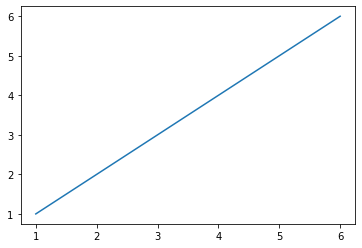

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"var1":[1,2,3,4,5,6], "var2":[1,2,3,4,5,6]})
plt.plot(df["var1"], df["var2"])
plt.show()

**With version 1.5+**

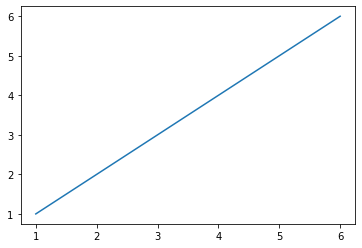

In [174]:
plt.plot("var1", "var2", data=df)
plt.show()

<a id="chaining">

### Method Chaining

[[back to top](#top)]

With method chaining, it eliminates the need for making intermediary variables.  You can process your data frame in a series of method calls when you enclose your data frame with parenthesis. Here's a very contrived example where you are creating these intermediary variables between transformation steps:

In [ ]:
df = pd.read_csv('data.csv')
df = df.fillna(...)
df = df.query('some_condition')
df['new_column'] = df.cut(...)
df = df.pivot_table(...)
df = df.rename(...)

Instead of the above, we can chain the methods as long as you surround the code with parenthesis:

In [ ]:
(pd.read_csv('data.csv')
   .fillna(...)
   .query('some_condition')
   .assign(new_column = df.cut(...))
   .pivot_table(...)
   .rename(...)
)

It is recommended that you don't use method chaining if it will significantly impact readability.

**Also check out [pipe() method](http://pandas.pydata.org/pandas-docs/stable/basics.html#tablewise-function-application) as it can also be used to better organize data transformations in discrete functions.**

<a id="pipe">

### pipe() example

A short series of video [tutorials](https://calmcode.io/pandas-pipe/introduction.html) on using `pipe()`

[[back to top](#top)]

In [175]:
import pandas as pd
df = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [176]:
df

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [177]:
def mean_age_by_group(df, col):
    return df.groupby(col).mean()

In [178]:
def uppercase_column_names(df):
    df.columns = df.columns.str.upper()
    return df

In [179]:
(df.pipe(mean_age_by_group, col='group')
     .pipe(uppercase_column_names)
)

,OUNCES
group,
a,6.3333333
b,7.1666667
c,4.6666667


<a id="rpy2">

[[back to top](#top)]